# CSCN8000 –Artificial Intelligence Algorithms and Mathematics
<br>
Name       : Khushbu Nileshkumar Lad<br>
Student No : 9027375

## Lab 3: California Housing Prices Prediction

## Data Preprocessing Tasks

#### Code initialization and validation

In [450]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [451]:
housing_dataset = pd.read_csv("./Dataset/housing_dataset.csv")
housing_dataset.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND


#### Understand Data : median_house_value

Validate column data : Null/NaN Values

In [452]:
print(f"Null Values in column : {housing_dataset['median_house_value'].isnull().sum()}")
clean_house_value = housing_dataset['median_house_value'].dropna()
clean_house_value.describe()

Null Values in column : 80


count     20560.000000
mean     207334.239348
std      115352.171422
min       14999.000000
25%      120600.000000
50%      180400.000000
75%      265225.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [453]:
print(f"mean   : {clean_house_value.mean()}")
print(f"median : {clean_house_value.median()}")
print(f"mode   : {clean_house_value.mode()}")

mean   : 207334.23934824902
median : 180400.0
mode   : 0    500001.0
Name: median_house_value, dtype: float64


### Outlier

##### Use clean data : box plot to identify outliers

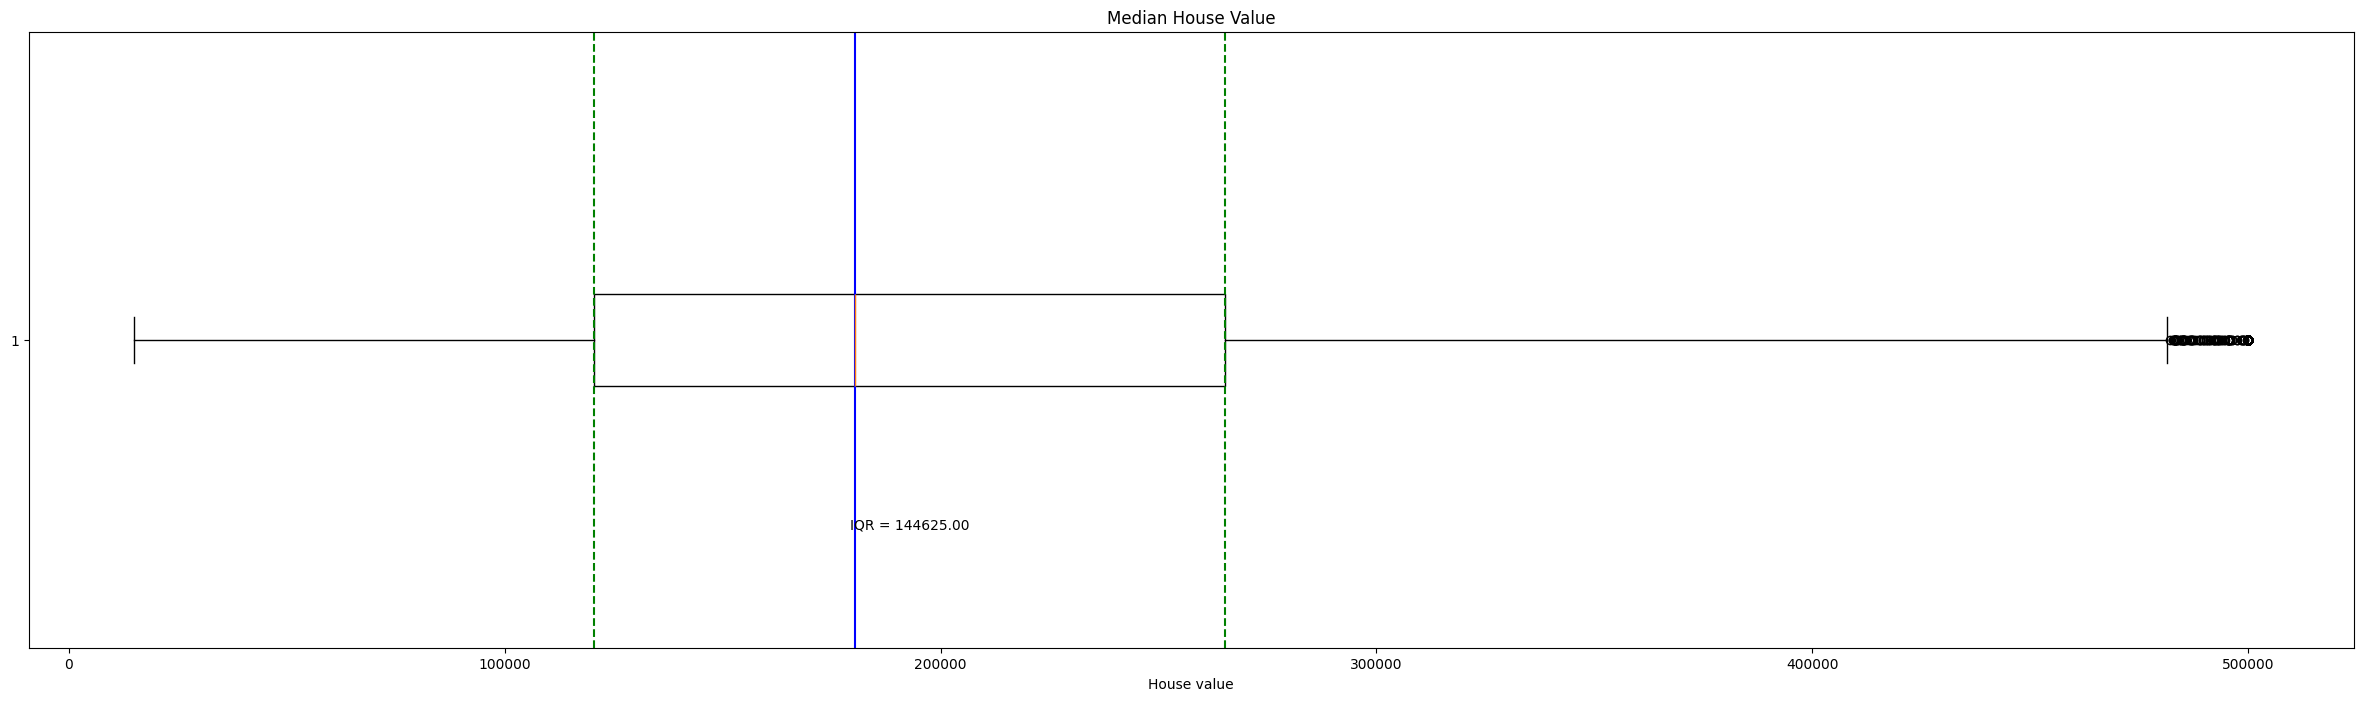

In [454]:
plt.figure(figsize=(30, 8))
plt.boxplot(clean_house_value,vert=False,whis=1.5)
plt.title('Median House Value')
plt.xlabel('House value')

q1 = np.percentile(clean_house_value, 25)
q2 = np.median(clean_house_value)
q3 = np.percentile(clean_house_value, 75)
iqr = q3 - q1

# Highlight Q1, Q2 (median), and IQR
plt.axvline(q1, color='green', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='blue', linestyle='-', label=f'Median (Q2): {q2:.2f}')
plt.axvline(q3, color='green', linestyle='--', label=f'Q3: {q3:.2f}')
plt.text((q1 + q3)/2, 0.7, f'IQR = {iqr:.2f}', verticalalignment='center', horizontalalignment='center')
plt.show()


#### Whisker's Approach to Identify Outlier

In [455]:
print(f"Q1  : {q1}")
print(f"Q2  : {q2}")
print(f"Q3  : {q3}")
print(f"IQR : {iqr}")

lower_bound = q1- (1.5*iqr)
upper_bound = q3+ (1.5*iqr)
print(f"lower_bound  : {lower_bound}")
print(f"upper_bound  : {upper_bound}")



Q1  : 120600.0
Q2  : 180400.0
Q3  : 265225.0
IQR : 144625.0
lower_bound  : -96337.5
upper_bound  : 482162.5


Values below lower bound and above higher bound is considered as "outliers"

In [456]:
outliers = clean_house_value[(clean_house_value < lower_bound) | (clean_house_value > upper_bound)]
print(outliers)

19568    482200.0
19569    482700.0
19570    482900.0
19571    483100.0
19572    483300.0
           ...   
20635    500001.0
20636    500001.0
20637    500001.0
20638    500001.0
20639    500001.0
Name: median_house_value, Length: 1072, dtype: float64


#### Remove outlier rows from dataset

In [457]:
housing_dataset = housing_dataset[(housing_dataset['median_house_value'] >= lower_bound) & (housing_dataset['median_house_value'] <= upper_bound)]

###  Missing Value 

##### Histogram to understand distribution

1. Red line indicates : Mean
2. Green line indicates : Median

longitude : 0
latitude : 0
housing_median_age : 3
total_rooms : 11
total_bedrooms : 200
population : 10
households : 14
median_income : 4
median_house_value : 0


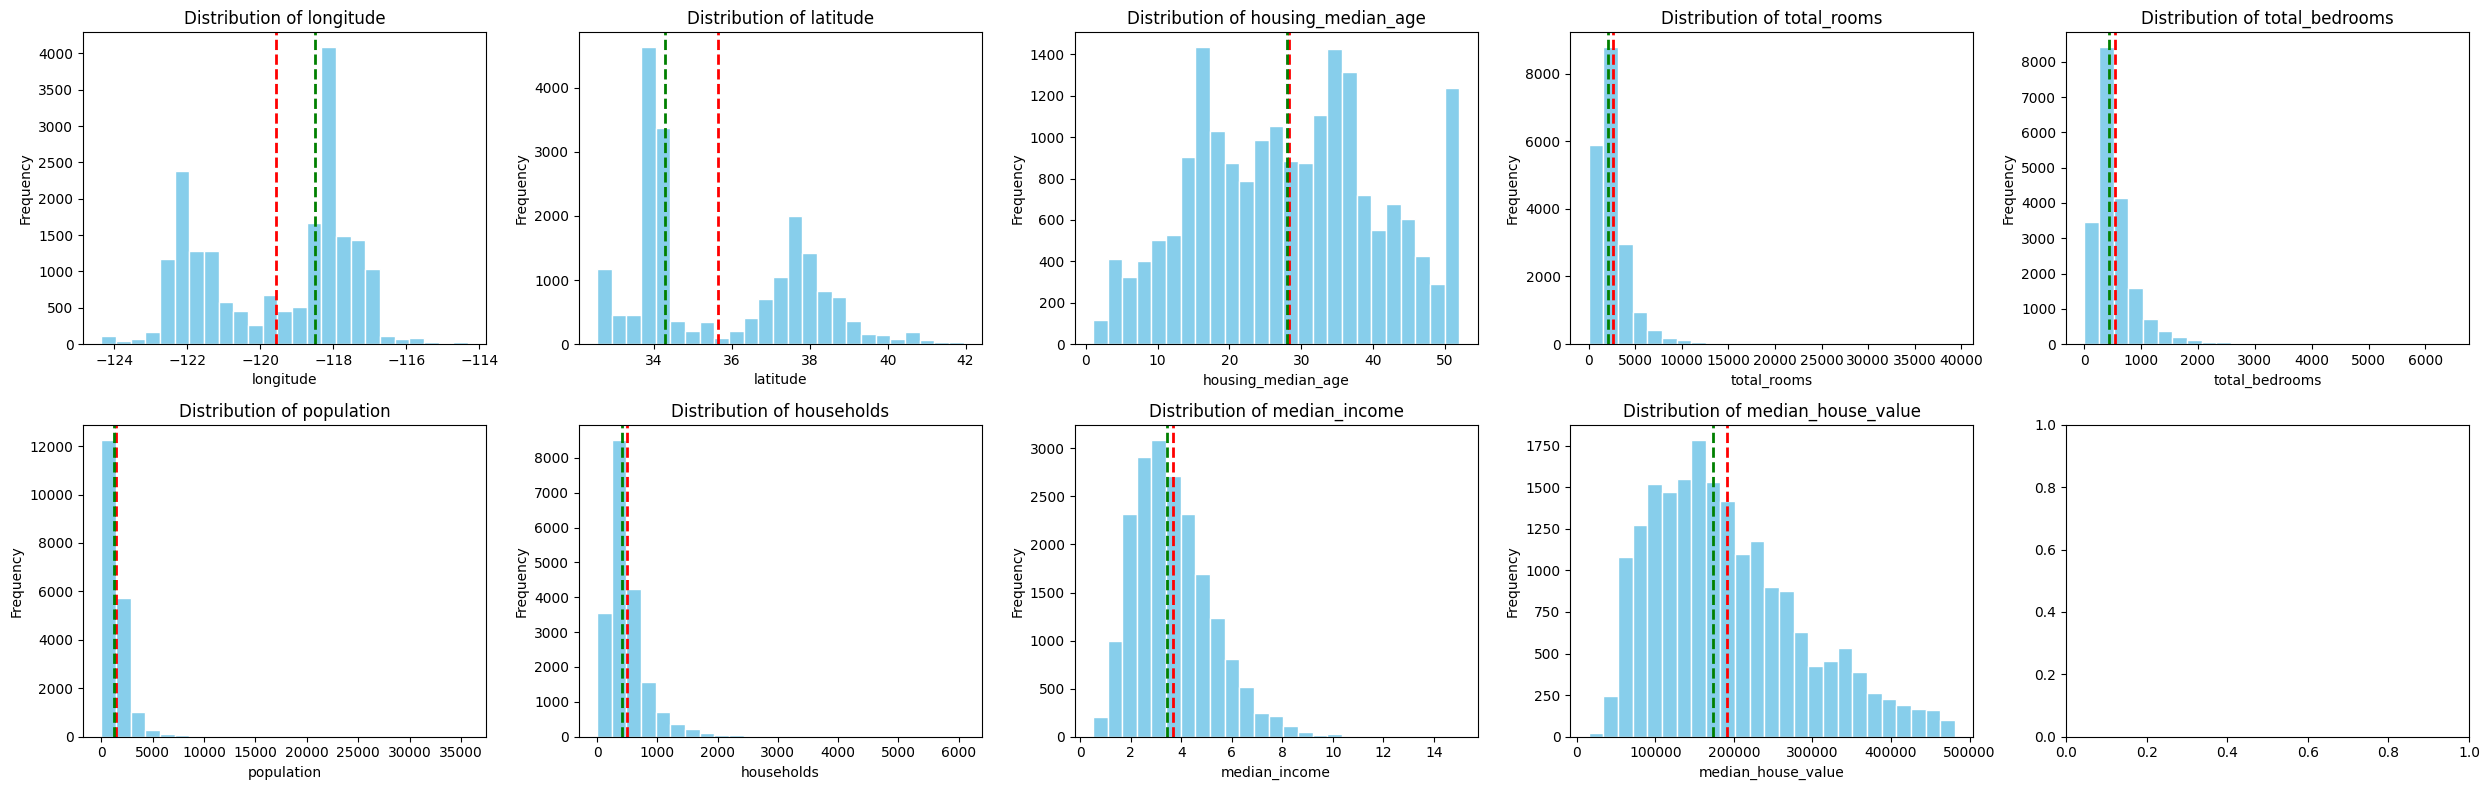

In [458]:
# Set the number of columns for subplots
columns_per_row = 5
num_columns = len(housing_dataset.columns)
num_rows = (num_columns + columns_per_row - 1) // columns_per_row  # Calculate number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(5 * columns_per_row, 4 * num_rows))

# Flatten the axes array for easy iteration if there are multiple rows
axes = axes.flatten()

for ax, column in zip(axes, housing_dataset.columns):
    if housing_dataset[column].dtype in ['float64', 'int64']:
        # Print the missing values for each column
        missing_values = housing_dataset[column].isnull().sum()
        print(f'{column} : {missing_values}')

        # Create a histogram
        ax.hist(housing_dataset[column], bins=25, edgecolor='white', color="skyblue")  # Adjust bins for more or less granularity
        ax.axvline(housing_dataset[column].mean(), color='red', linestyle='dashed', linewidth=2)  # Mean line
        ax.axvline(housing_dataset[column].median(), color='green', linestyle='dashed', linewidth=2)  # Median line
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()


As per the histogram, price distribution is ***Right Skewed Distribution*** 
In addition to this, for the value 5000000, more than 1000 outliers are available in the data.
As, ***Mean is sensitive to outliers***, for the "Median house value", ***median is better choice*** to impute the values

| Column | Distribution | Handle missing value by | Reason
|--------|--------------|-------------------------|----------
|longitude|-|mean| Distribution is not symmetric
|latitude|-|mean| Distribution is not symmetric
|housing_median_age|Negatively Skewed Distribution|median| Mean is sensitive to outliers
|total_rooms|Positively Skewed Distribution|median| Mean is sensitive to outliers
|total_bedrooms|Positively Skewed Distribution|median| Mean is sensitive to outliers
|population|Positively Skewed Distribution|median| Mean is sensitive to outliers
|households|Positively Skewed Distribution|median| Mean is sensitive to outliers
|median_income|Positively Skewed Distribution|median| Mean is sensitive to outliers
|median_house_value|Positively Skewed Distribution|median| Mean is sensitive to outliers

In [459]:
## Set Missing values in dataset
housing_dataset['longitude'] = housing_dataset['longitude'].fillna(housing_dataset['longitude'].mean())
housing_dataset['latitude'] = housing_dataset['latitude'].fillna(housing_dataset['latitude'].mean())
housing_dataset['housing_median_age'] = housing_dataset['housing_median_age'].fillna(housing_dataset['housing_median_age'].median())
housing_dataset['total_rooms'] = housing_dataset['total_rooms'].fillna(housing_dataset['total_rooms'].median())
housing_dataset['total_bedrooms'] = housing_dataset['total_bedrooms'].fillna(housing_dataset['total_bedrooms'].median())
housing_dataset['population'] = housing_dataset['population'].fillna(housing_dataset['population'].median())
housing_dataset['households'] = housing_dataset['households'].fillna(housing_dataset['households'].median())
housing_dataset['median_income'] = housing_dataset['median_income'].fillna(housing_dataset['median_income'].median())
housing_dataset['median_house_value'] = housing_dataset['median_house_value'].fillna(housing_dataset['households'].median())


#### Categorical feature : ocean_proximity


As dataset has 6 possible values in the column, ***Random distribution*** would be better in order to impute this value

In [460]:
print(f"Missing values : {housing_dataset['ocean_proximity'].isnull().sum()}")

print("\r\n Possible unique Values")
distinct_values = housing_dataset['ocean_proximity'].str.lower().dropna().unique()
print(distinct_values)

# Random distribution
nan_indices = housing_dataset[housing_dataset['ocean_proximity'].isnull()].index
random_values = np.random.choice(distinct_values, size=len(nan_indices))

housing_dataset.loc[nan_indices, 'ocean_proximity'] = random_values

Missing values : 147

 Possible unique Values
['inland' '<1h ocean' 'near bay' 'near ocean' 'near_bay' 'island']


### Investigate the existence of errors/inconsistencies in the fields and solve them.

Box plot for numerical columns

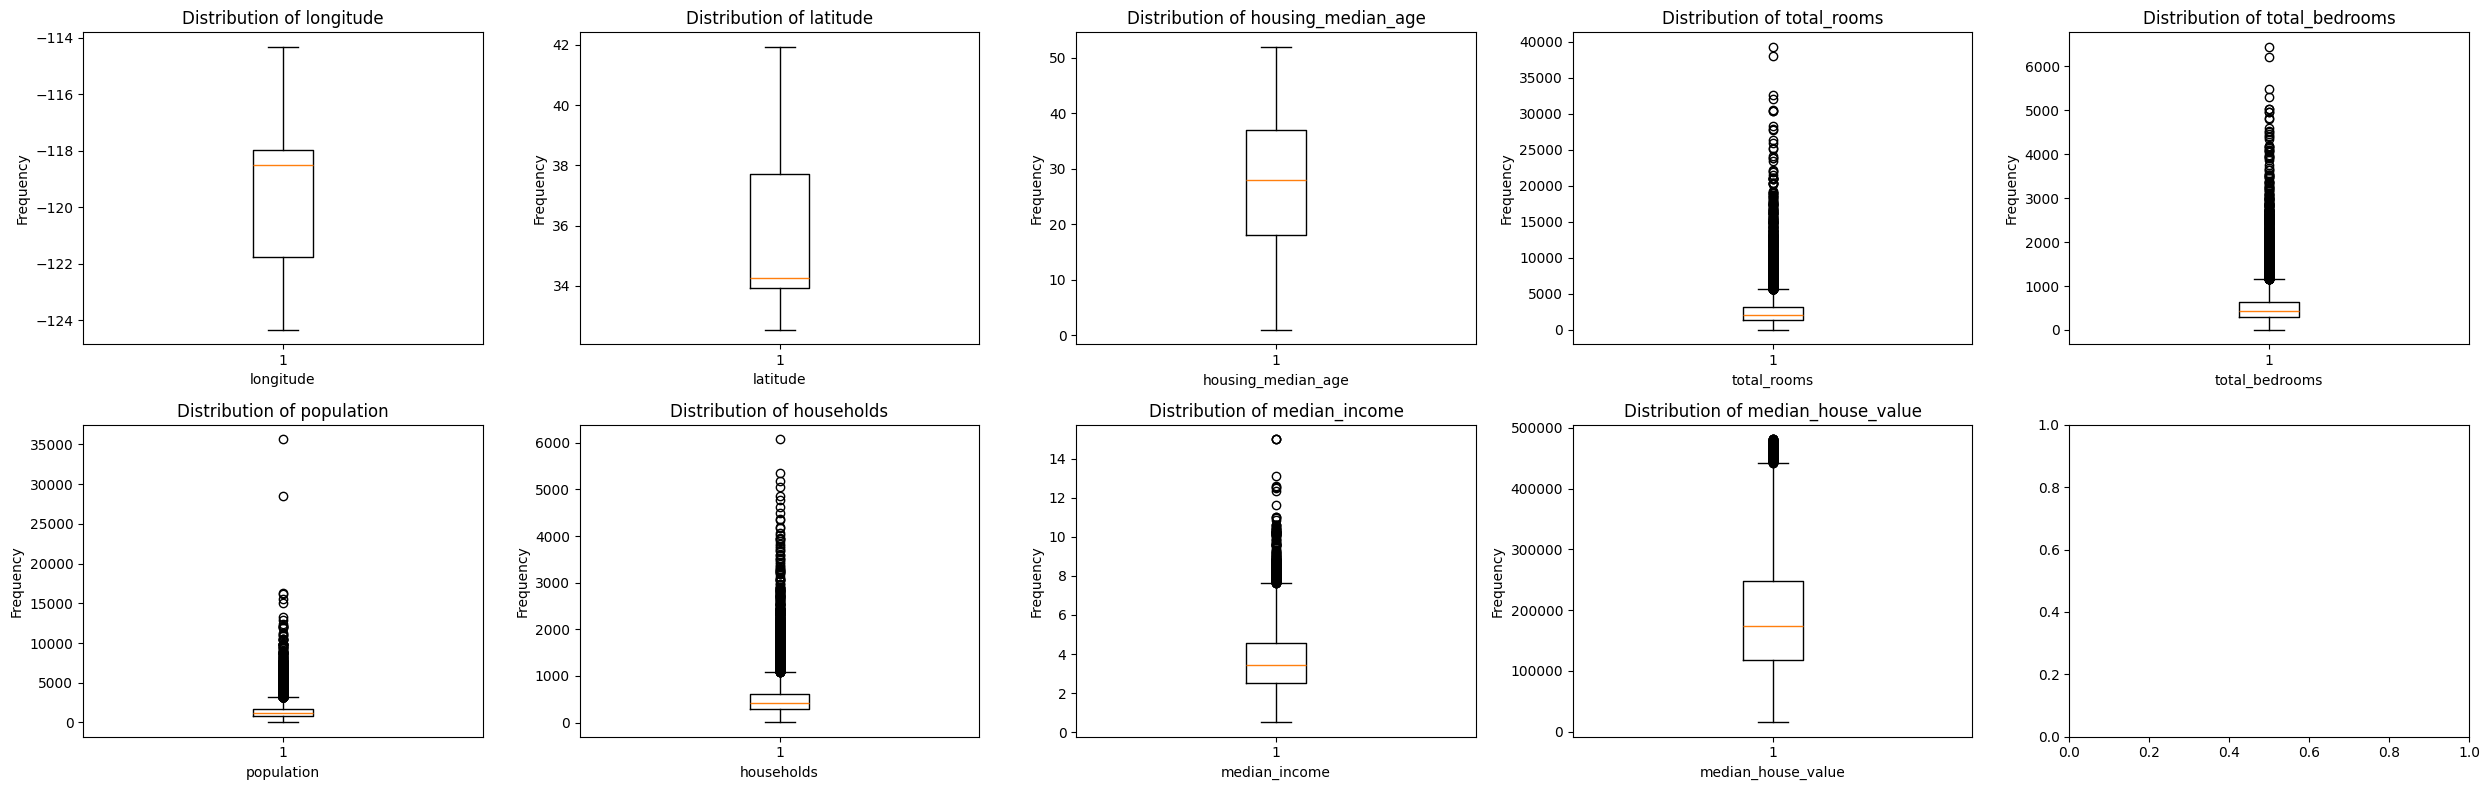

In [461]:
# Set the number of columns for subplots
columns_per_row = 5
num_columns = len(housing_dataset.columns)
num_rows = (num_columns + columns_per_row - 1) // columns_per_row  # Calculate number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(5 * columns_per_row, 4 * num_rows))

# Flatten the axes array for easy iteration if there are multiple rows
axes = axes.flatten()

for ax, column in zip(axes, housing_dataset.columns):
    if housing_dataset[column].dtype in ['float64', 'int64']:
        # Create a histogram
        ax.boxplot(housing_dataset[column])  # Adjust bins for more or less granularity
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()


1. **Longitude, Latitude** - geographical data does not require corrections as mean median does not affect it 
2. **housing_median_Age** - Box plot is not showing outliers as well as mean value is also practically considerable.
3. **total_rooms, total_bedrooms** - There is huge data available out of upper and lower whisker bound, if there is certain relationship between both i.e total rooms + total bedroom, than data is correct. It is checked in next steps

#### Relation between total room and total bedroom

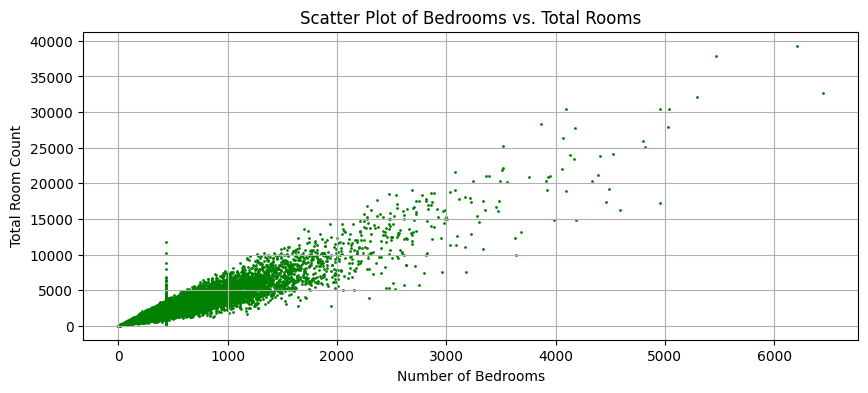

In [462]:
plt.figure(figsize=(10, 4))
plt.scatter(housing_dataset['total_bedrooms'], housing_dataset['total_rooms'], color='green',s=1)
plt.title('Scatter Plot of Bedrooms vs. Total Rooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Total Room Count')
plt.grid()
plt.show()

As per the plotting, There is linear Proportional relationship between total rooms and total bedroom size. There are some visible inconsistency on 500 bedrooms count. However, practically, Number of bedroom < Total number of rooms. So it is not error.

### Normalize Data

In [463]:
numerical_df = housing_dataset.select_dtypes(include=[np.number])

# Calculate skewness for numerical columns
skewness = numerical_df.skew()
print("Skewness of numerical columns:\n", skewness)

# Normalize based on skewness
normalized_data = pd.DataFrame()

for column in numerical_df.columns:
    if skewness[column] > 1 or skewness[column] < -1:
        # Strongly skewed - Apply log transformation
        normalized_data[column] = np.log1p(numerical_df[column].values)  # Using .values to get 1D array
    elif -1 <= skewness[column] <= 1:
        # Approximately normal - Use Min-Max normalization
        scaler = MinMaxScaler()
        normalized_data[column] = scaler.fit_transform(numerical_df[[column]]).ravel()  # Flatten to 1D
    else:
        # Moderately skewed - Use Z-Score normalization
        scaler = StandardScaler()
        normalized_data[column] = scaler.fit_transform(numerical_df[[column]]).ravel()  # Flatten to 1D

Skewness of numerical columns:
 longitude            -0.289652
latitude              0.454793
housing_median_age    0.072712
total_rooms           4.228194
total_bedrooms        3.480069
population            4.963123
households            3.408352
median_income         0.888265
median_house_value    0.753264
dtype: float64


#### Histogram for normalised data

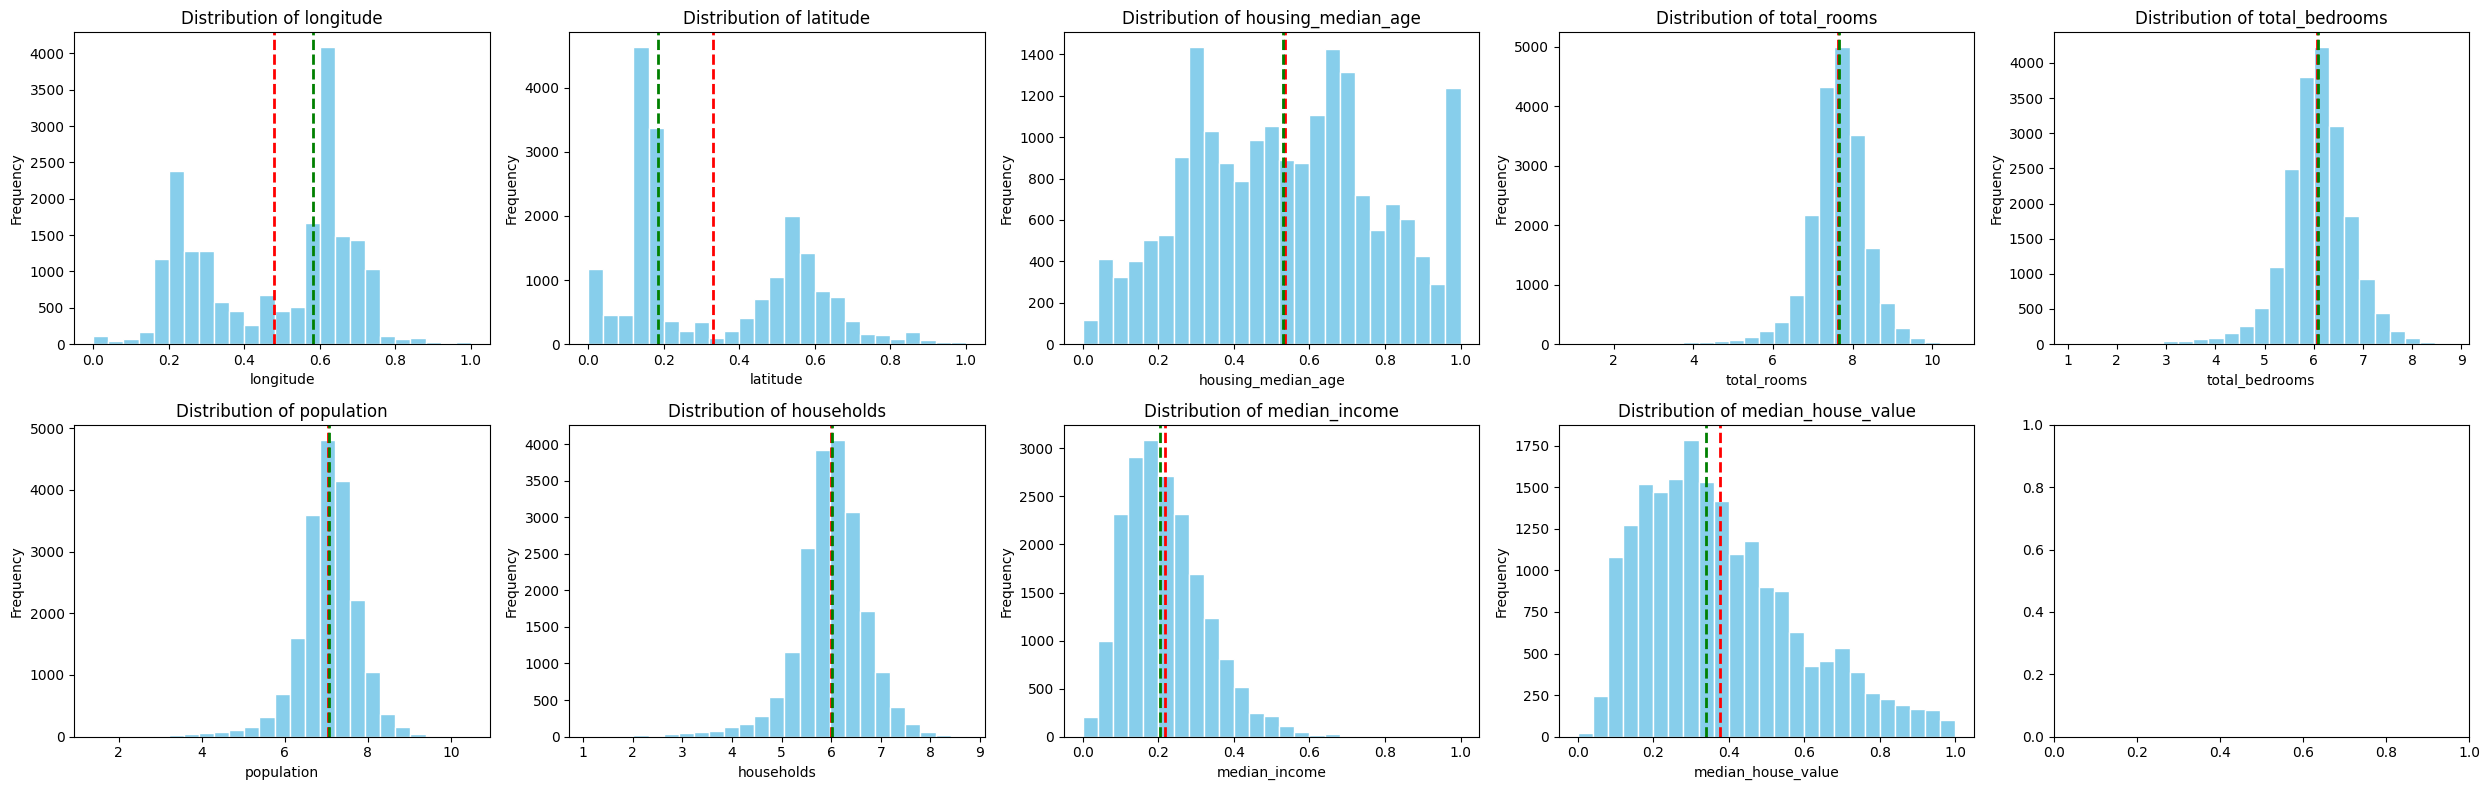

In [464]:
# Set the number of columns for subplots
columns_per_row = 5
num_columns = len(housing_dataset.columns)
num_rows = (num_columns + columns_per_row - 1) // columns_per_row  # Calculate number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(5 * columns_per_row, 4 * num_rows))

# Flatten the axes array for easy iteration if there are multiple rows
axes = axes.flatten()

for ax, column in zip(axes, normalized_data.columns):
    if normalized_data[column].dtype in ['float64', 'int64']:
        # Create a histogram
        ax.hist(normalized_data[column], bins=25, edgecolor='white', color="skyblue")  # Adjust bins for more or less granularity
        ax.axvline(normalized_data[column].mean(), color='red', linestyle='dashed', linewidth=2)  # Mean line
        ax.axvline(normalized_data[column].median(), color='green', linestyle='dashed', linewidth=2)  # Median line
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()


### Encode categorical variables : ocean_proximity - Label encoder

In [465]:
normalized_data["ocean_proximity"]=housing_dataset["ocean_proximity"].str.lower().replace("_"," ")

label_encoder = LabelEncoder()
normalized_data['ocean_proximity_encoded'] = label_encoder.fit_transform(normalized_data['ocean_proximity'])

normalized_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
0,0.160359,0.761955,0.294118,5.545177,4.304065,4.454347,3.663562,0.080054,0.000000,inland,1
1,0.730080,0.410202,0.352941,6.429719,5.480639,6.196444,5.105945,0.110350,0.000000,inland,1
2,0.646414,0.180659,1.000000,6.689599,5.590987,6.444131,5.420535,0.254707,0.000000,inland,1
3,0.117530,0.825717,0.686275,4.595120,3.367296,2.944439,2.197225,0.002490,0.000000,inland,1
4,0.599602,0.171095,0.745098,6.202536,5.129899,5.560682,4.934474,0.128743,0.005361,<1h ocean,0
5,0.202191,0.572795,0.627451,5.693732,4.304065,5.379897,4.158883,0.150005,0.016079,near bay,3
6,0.774900,0.307120,0.137255,9.207937,7.463937,8.829958,7.272398,0.152681,0.016079,inland,1
7,0.716135,0.018066,1.000000,6.740519,6.113682,7.115582,5.929589,0.040820,0.016079,near ocean,4
8,0.304781,0.574920,1.000000,4.682131,4.382027,5.123964,3.988984,0.020124,0.016079,inland,1
9,0.966135,0.026567,0.392157,3.806662,3.526361,4.174387,3.332205,0.024634,0.021438,inland,1


### Engineer one new feature based on existing features  : Bedrooms per Room
Identify weather there are more bedrooms or general purpose room

In [466]:
# Feature Engineering: Rooms per Household
normalized_data['bedrooms_per_room'] = normalized_data['total_bedrooms'] / normalized_data['total_rooms']
normalized_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded,bedrooms_per_room
0,0.160359,0.761955,0.294118,5.545177,4.304065,4.454347,3.663562,0.080054,0.000000,inland,1,0.776182
1,0.730080,0.410202,0.352941,6.429719,5.480639,6.196444,5.105945,0.110350,0.000000,inland,1,0.852392
2,0.646414,0.180659,1.000000,6.689599,5.590987,6.444131,5.420535,0.254707,0.000000,inland,1,0.835773
3,0.117530,0.825717,0.686275,4.595120,3.367296,2.944439,2.197225,0.002490,0.000000,inland,1,0.732798
4,0.599602,0.171095,0.745098,6.202536,5.129899,5.560682,4.934474,0.128743,0.005361,<1h ocean,0,0.827065
5,0.202191,0.572795,0.627451,5.693732,4.304065,5.379897,4.158883,0.150005,0.016079,near bay,3,0.755930
6,0.774900,0.307120,0.137255,9.207937,7.463937,8.829958,7.272398,0.152681,0.016079,inland,1,0.810598
7,0.716135,0.018066,1.000000,6.740519,6.113682,7.115582,5.929589,0.040820,0.016079,near ocean,4,0.907005
8,0.304781,0.574920,1.000000,4.682131,4.382027,5.123964,3.988984,0.020124,0.016079,inland,1,0.935904
9,0.966135,0.026567,0.392157,3.806662,3.526361,4.174387,3.332205,0.024634,0.021438,inland,1,0.926365


## Descriptive Analytics Tasks

### Investigate the distribution of housing prices across different ocean proximities in California.

In [467]:
# Group by 'ocean_proximity' and calculate summary statistics for 'median_house_value'
summary_stats = normalized_data.groupby('ocean_proximity')['median_house_value'].describe()

# Display summary statistics
print("Summary Statistics of Median House Value by Ocean Proximity:")
print(summary_stats)

Summary Statistics of Median House Value by Ocean Proximity:
                  count      mean       std       min       25%       50%  \
ocean_proximity                                                             
<1h ocean        8424.0  0.447678  0.180194  0.005361  0.317043  0.415864   
inland           6487.0  0.232931  0.139866  0.000000  0.135908  0.201074   
island             29.0  0.389978  0.199847  0.302252  0.303324  0.307183   
near bay         2020.0  0.477357  0.210979  0.016079  0.311470  0.441266   
near ocean       2400.0  0.452014  0.210111  0.016079  0.281245  0.432799   
near_bay           48.0  0.195621  0.078492  0.129691  0.140677  0.144482   

                      75%       max  
ocean_proximity                      
<1h ocean        0.548983  1.000000  
inland           0.286175  0.974062  
island           0.307826  0.948124  
near bay         0.637032  0.999571  
near ocean       0.586818  0.998499  
near_bay         0.302895  0.308254  


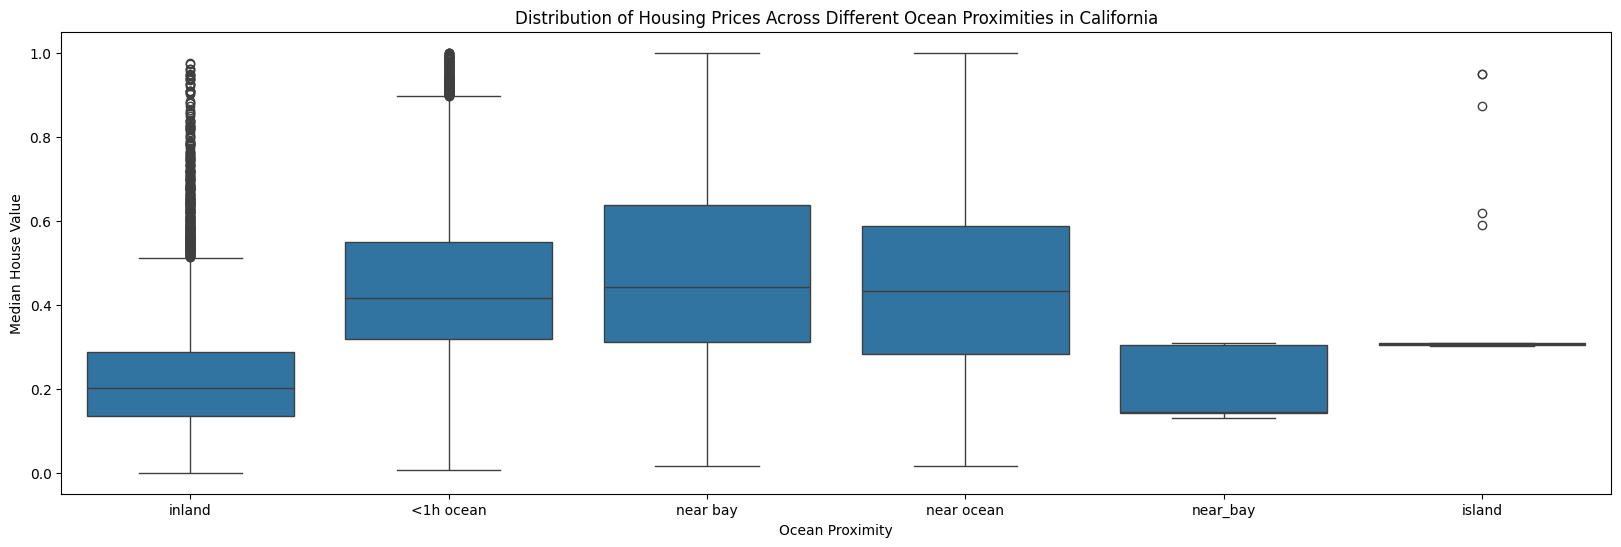

In [468]:
# Plotting the distribution of housing prices across different ocean proximities
plt.figure(figsize=(20, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=normalized_data)
plt.title('Distribution of Housing Prices Across Different Ocean Proximities in California')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

1. Houses near water are usually more expensive than those farther inland; on the other hand, houses near a bay or the ocean are usually more reasonably priced.
2. Price Variability: "Island" has the least variability, while "Inland" has the greatest variability with numerous outliers.
3. Outliers: A few categories, most notably "Inland" and "<1h Ocean," show outliers at the upper end of the price range, signifying extraordinary homes that cost a lot more than the others.

### Analyze the relationship between median income and housing prices.

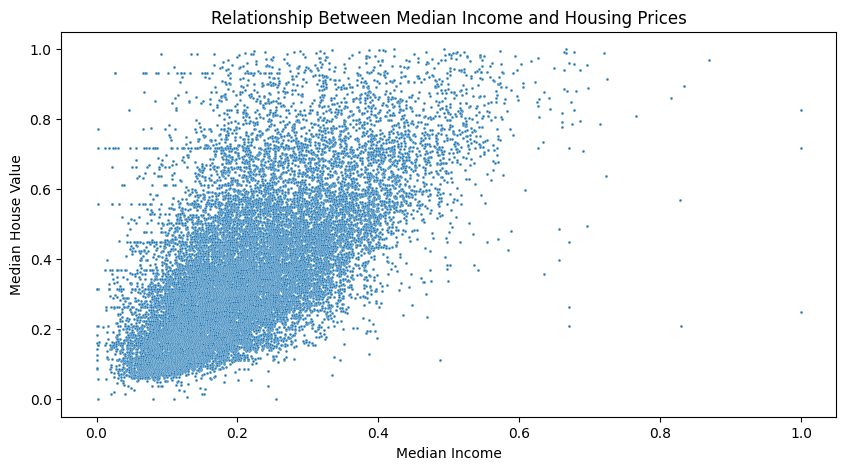

In [469]:
# Scatter plot to visualize the relationship between median income and housing prices
plt.figure(figsize=(10, 5))
sns.scatterplot(x='median_income', y='median_house_value', data=normalized_data,s=4)
plt.title('Relationship Between Median Income and Housing Prices')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

In [470]:
# Calculate the correlation coefficient
correlation = np.corrcoef(normalized_data['median_income'], normalized_data['median_house_value'])[0, 1]
print(f"Correlation between Median Income and Median House Value: {correlation:.2f}")

Correlation between Median Income and Median House Value: 0.64


As 0.64 is not close to 1, it indicates **Weak Correlation** i.e while income is a factor, other variables also significantly influence housing prices.

## ML Model Training and Testing Tasks

#### Split the cleaned data from the first section into training and testing sets (e.g., 80% training, 20% testing).

In [471]:
np.random.seed(42)
split_index = int(0.8 * len(normalized_data))
shuffled_indices = np.random.permutation(len(normalized_data))
split_index = int(0.8 * len(normalized_data))
# split dataset
train_set = housing_dataset.iloc[shuffled_indices[:split_index]]
test_set = housing_dataset.iloc[shuffled_indices[split_index:]]
print(f"Training set size: {train_set.shape}")
print(f"Testing set size: {test_set.shape}")


Training set size: (15590, 10)
Testing set size: (3898, 10)


#### Implement the closed-form solution to linear regression

In [472]:
# Identify X & Y
# Drop any non-numerical columns 'ocean_proximity'
X_train = train_set.drop(["median_house_value", "ocean_proximity"], axis=1)  # Drop target and categorical feature
y_train = train_set["median_house_value"]

# Add a column of ones to X_train for the intercept term
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add a bias term (column of ones)

# Closed-form solution to linear regression: (X^T * X)^-1 * X^T * y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

# Get feature names including the intercept term
feature_names = ['Intercept'] + list(X_train.columns)

# Create a DataFrame to display the weights with feature names
weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': [f"{weight:.2f}" for weight in theta_best]})

# Print the resulting weights DataFrame
print(weights_df)

              Feature       Weight
0           Intercept  -3311748.92
1           longitude    -39344.60
2            latitude    -38657.42
3  housing_median_age       981.58
4         total_rooms        -7.51
5      total_bedrooms        72.80
6          population       -29.79
7          households        64.38
8       median_income     38234.42


##### Summary of Theta
**Key Influencer**: Based on weight, median income is the best predictor of median housing value.
<br>
**Negative Influencers**: Areas further east or north may have lower property values, possibly as a result of socioeconomic reasons or urban sprawl. Both longitude and latitude have large negative weights.

#### Make predictions

In [473]:
X_train = train_set.drop(["median_house_value", "ocean_proximity"], axis=1) 
X_b_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
y_pred = X_b_train.dot(theta_best)
print("Predicted Median House Values:", y_pred)


Predicted Median House Values: [201659.60838273 180582.97871368 219645.19643615 ... 218187.65952281
 241936.76798436 178290.77579687]


In [474]:
# Calculate Mean Absolute Error (MAE)
def mean_absolute_error(y_actual, y_pred):
    return np.mean(np.abs(y_actual - y_pred))

# Calculate Mean Squared Error (MSE)
def mean_squared_error(y_actual, y_pred):
    return np.mean((y_actual - y_pred) ** 2)

# Compute MAE and MSE
mae = mean_absolute_error(train_set["median_house_value"].values, y_pred)
mse = mean_squared_error(train_set["median_house_value"].values, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 44960.43816153875
Mean Squared Error (MSE): 3629385697.6873164


#### Plot Actual & Predicted value

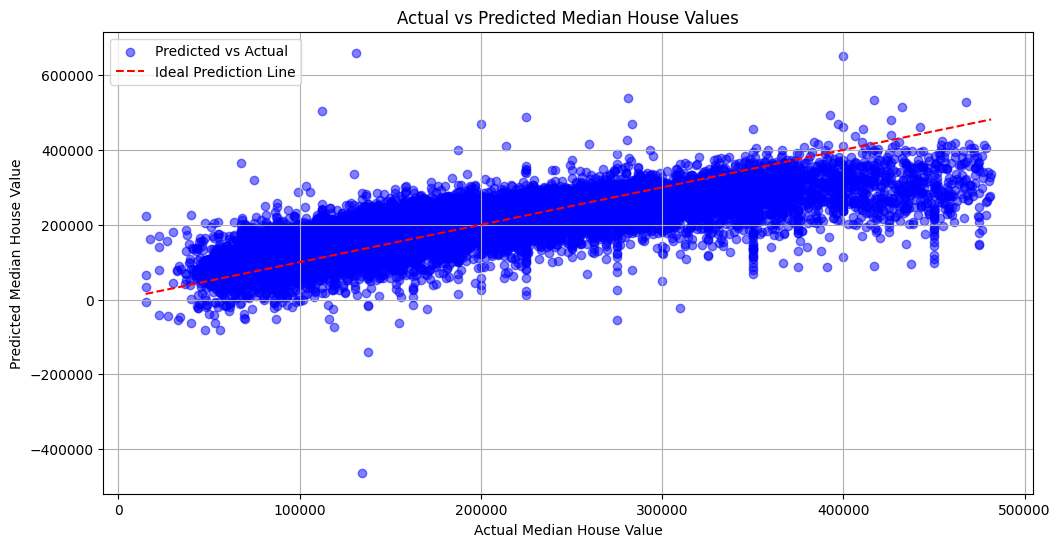

In [475]:
# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))

# Scatter plot for actual vs predicted values
plt.scatter(train_set["median_house_value"].values, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')

# Plotting the ideal line (y = x) for reference
plt.plot([train_set["median_house_value"].values.min(), train_set["median_house_value"].values.max()], [train_set["median_house_value"].values.min(), train_set["median_house_value"].values.max()], color='red', linestyle='--', label='Ideal Prediction Line')

# Adding labels and title
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

#### Summary : 

According to the MAE, there is an average deviation of $44,960.44 between the median house values predicted by the model and the actual values.
This implies that, **for a normal prediction, the model might be off by this much, which, given the context of home prices, can be seen as a considerable inaccuracy.**
<br><br>
At 3,629,385,697.69, **the MSE is a significant value**. MSE highlights bigger errors more than MAE since it squares the differences. This measure shows that there are times when the model's predictions diverge greatly from the observed values.
<br><br>
**A high mean squared error (MSE) indicates that while some forecasts may be quite near to the actual values, others may be much off, which adds to the high MSE.**
